# **K-Means Clustering**

## Pengumpulan Data

### Koneksi dengan Drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Import Library dan Dataset

In [2]:
import pandas as pd
import numpy as np
import os
import glob

In [3]:
#Pilih direktori Tokped
os.chdir("/content/drive/My Drive/Dataset/Laptop_Price_List_Tokopedia/Tokped")

## Feature Selecting

### Import Library

In [4]:
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [6]:
# import dataset
encode = pd.read_csv('tokped_encode2.csv')
encode

,memory_size,location_cat,sold_cat,type_cat,merk_cat,prosesor_cat,disk_size_cat,price_cat
0,2,12,0,6,0,14,5,0
1,1,60,2,6,0,4,10,0
2,1,13,1,6,0,4,10,0
3,3,13,2,6,0,17,10,1
4,1,13,112,6,0,14,10,0
...,...,...,...,...,...,...,...,...
119054,4,12,0,44,2,10,8,1
119055,4,16,1,44,2,18,8,1
119056,2,2,0,44,2,14,5,0
119057,2,24,6,44,2,18,5,1


### Korelasi Pearson

In [7]:
encode.corr(method ='pearson')

,memory_size,location_cat,sold_cat,type_cat,merk_cat,prosesor_cat,disk_size_cat,price_cat
memory_size,1.000000,-0.133556,-0.018611,0.243588,0.170646,0.256102,0.026856,0.673787
location_cat,-0.133556,1.000000,-0.061871,-0.027197,0.003731,-0.095044,-0.034360,-0.129028
sold_cat,-0.018611,-0.061871,1.000000,-0.011037,0.066414,-0.073333,-0.014702,-0.060603
type_cat,0.243588,-0.027197,-0.011037,1.000000,-0.219462,0.162953,-0.004387,0.285354
merk_cat,0.170646,0.003731,0.066414,-0.219462,1.000000,0.020518,-0.111566,0.026247
prosesor_cat,0.256102,-0.095044,-0.073333,0.162953,0.020518,1.000000,0.067873,0.288059
disk_size_cat,0.026856,-0.034360,-0.014702,-0.004387,-0.111566,0.067873,1.000000,0.167991
price_cat,0.673787,-0.129028,-0.060603,0.285354,0.026247,0.288059,0.167991,1.000000


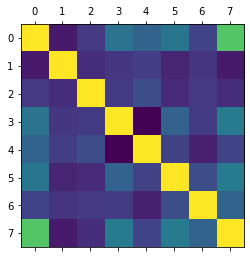

In [8]:
plt.matshow(encode.corr())
plt.show()

Dari hasil korelasi dapat dilihat bahwa fitur `price_cat` dengan `memory_size` memiliki korelasi yang cukup tinggi. Maka kedua fitur ini akan dipilih untuk diuji coba dalam proses klusterisasi.

In [ ]:
# Mengambil kolom price_cat dan memory_size sebagai fitur untuk di-cluster
pricememory = encode[['price_cat', 'memory_size']]

In [ ]:
x_array = np.array(pricememory)
x_array

array([[0, 2],
       [0, 1],
       [0, 1],
       ...,
       [0, 2],
       [1, 2],
       [2, 4]])

### Feature Scaling

Penskalaan fitur adalah metode yang digunakan untuk menormalkan rentang variabel independen atau fitur data. Ada dua jenis teknik penskalaan fitur, yaitu :
* Normalisasi
* Standardisasi

Informasi lebih detil tentang ini, dapat dibaca pada link berikut :
https://ichi.pro/id/penskalaan-fitur-dalam-machine-learning-36136038374347

Saat ini, kita akan menggunakan penskalaan fitur standardisasi karena dianggap lebih baik dalam menangani pencilan (outlier)

In [ ]:
# Standardisasi semua kolom
scaler = StandardScaler()
scaled_features = scaler.fit_transform(x_array)

In [ ]:
scaled_features

array([[-1.12460385, -0.90446752],
       [-1.12460385, -1.58680845],
       [-1.12460385, -1.58680845],
       ...,
       [-1.12460385, -0.90446752],
       [-0.39203279, -0.90446752],
       [ 0.34053826,  0.46021434]])

### Memperoleh Jumlah Cluster yang Tepat

The first step we need to do is to choose the number of clusters, we commonly called it as K. Actually there are a lot of methods we can use to find the optimal number of cluster (K), but in this experiment, I will just use one simple and popular method called `Elbow method`. In the `elbow method`, the chosen number of clusters is the place where the elbow was formed on the graph.

First, we need to get the value from the features above and store them in an array format.

Compute the sum of squared error(SSE) for some value of K. SSE is defined as the sum of the squared distance between centroid and each member of the cluster.

In [ ]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "random_state": 100,
}

# A list holds the SSE values for each k
sse = []
for k in range(1, 11):
    km = KMeans(n_clusters=k, **kmeans_kwargs)
    km.fit(scaled_features)
    sse.append(km.inertia_)

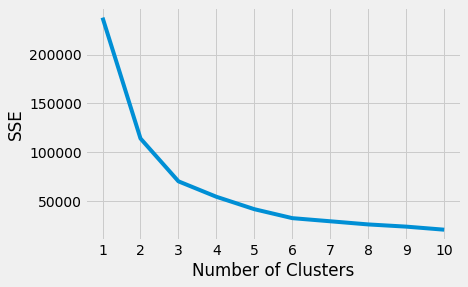

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1, 11), sse)
plt.xticks(range(1, 11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

Dari sini kita dapat melihat cluster yang tepat adalah 3 karena mulai terjal di 3. Namun kita bisa menggunakan cara lain untuk mendapatkan cluster yang paling tepat. We can use `kneed locator` library if it is difficult to decide which part of the graph is an elbow.

In [ ]:
!pip install kneed

In [ ]:
import kneed
from kneed import KneeLocator
kl = KneeLocator(
    range(1, 11), sse, curve="convex", direction="decreasing"
)
kl.elbow

3

By using `kneed locator` we finally find that the elbow is located when the `k = 3`. So that the number of clusters that we will use to build the K-means model is three clusters.

### Proses Clustering

In [ ]:
kmeans = KMeans(n_clusters=3, random_state=100)

In [ ]:
kmeans.fit(scaled_features)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=100, tol=0.0001, verbose=0)

In [ ]:
# The lowest SSE value
kmeans.inertia_

69959.67993327779

Before visualizing the cluster, I would like to find the centroid for each cluster.

In [ ]:
# Final locations of the centroid. Menampilkan pusat cluster.
kmeans.cluster_centers_

array([[ 1.14728859,  1.13136242],
       [-0.14562989,  0.11014172],
       [-0.94794261, -1.48776054]])

In [ ]:
# The number of iterations required to converge
kmeans.n_iter_

3

Finally, the cluster assignments are stored as a one-dimensional NumPy array in `kmeans.labels_`. Here’s a look at the first five predicted labels:

In [ ]:
kmeans.labels_[:5]

array([2, 2, 2, 1, 2], dtype=int32)

In [ ]:
y_kmeans = kmeans.predict(scaled_features)
y_kmeans

array([2, 2, 2, ..., 2, 2, 1], dtype=int32)

Now we can add a new column represent the cluster for each data to the previous data frame, here I will add a column named `cluster`.

In [ ]:
#Add new column to store the cluster 
pricememory['cluster'] = kmeans.labels_
pricememory

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,price_cat,memory_size,cluster
0,0,2,2
1,0,1,2
2,0,1,2
3,1,3,1
4,0,1,2
...,...,...,...
119054,1,4,1
119055,1,4,1
119056,0,2,2
119057,1,2,2


### Visualisasi

Finally, let’s create the visualization. Here I create the visualization based on two first features, `price_cat` and `type_cat`.

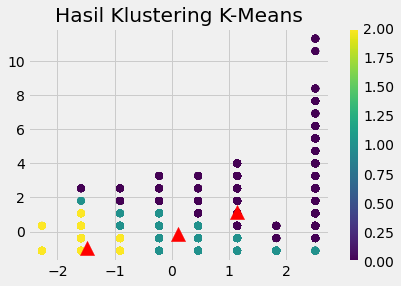

In [ ]:
output = plt.scatter(scaled_features[:,1], scaled_features[:,0], s = 50, c = pricememory.cluster, marker = 'o', alpha = 1, )
centers = kmeans.cluster_centers_
plt.scatter(centers[:,1], centers[:,0], c='red', s=200, alpha=1 , marker='^');
plt.title('Hasil Klustering K-Means')
plt.colorbar (output)
plt.show()

`Cluster 0` adalah yang berwarna ungu, `Cluster 1` yang berwarna biru langit, dan `Cluster 2` yang berwarna kuning.

## Get Insight of Cluster characteristics

In [ ]:
# Menampilkan dataset pricememory yang sudah ditambahkan kolom cluster
pricememory

,price_cat,memory_size,cluster
0,0,2,2
1,0,1,2
2,0,1,2
3,1,3,1
4,0,1,2
...,...,...,...
119054,1,4,1
119055,1,4,1
119056,0,2,2
119057,1,2,2


Memisahkan setiap cluster menjadi dataframe baru

In [ ]:
# Cluster 0. Jumlah datanya 28985
clus_0 = pricememory.groupby(["cluster"]).get_group(0)
clus_0.shape

(30664, 3)

In [ ]:
# Cluster 1. Jumlah datanya 47655
clus_1 = pricememory.groupby(["cluster"]).get_group(1)
clus_1.shape

(60591, 3)

In [ ]:
# Cluster 2. Jumlah datanya 42419
clus_2 = pricememory.groupby(["cluster"]).get_group(2)
clus_2.shape

(27804, 3)

Urutan cluster dari data terbanyak :
1. `clus_1` : 60591 row
2. `clus_0` : 30664 row
3. `clus_2` : 27804 row

`clus_1` dan `clus_0` dipilih untuk dipelajari karakteristiknya lebih lanjut (karena jumlah datanya paling banyak)

### **`clus_1`**

In [ ]:
clus_1['memory_size'].value_counts()

3    32105
4    27079
5      783
6      314
2      256
7       47
1        7
Name: memory_size, dtype: int64

Jika diperhatikan dari jumlah data transaksinya, transaksi pembelian laptop berdasarkan ukuran memory diatas 20ribu adalah kategori memory_size 3 (8 GB) dan 4 (12 GB).

Kita akan melihat lebih detail karakteristik apa yang dimiliki `Cluster 1` ini.

In [ ]:
#seleksi kolom yang ingin digunakan
char1 = pricememory.loc[(pricememory['cluster'] == 1)].groupby(['price_cat', 'memory_size'])['cluster'].count()
char1

price_cat  memory_size
0          3               4491
           4               1944
           5                141
           6                314
           7                 47
1          3              15292
           4              12156
           5                642
2          2                212
           3              10627
           4              12979
3          2                 44
           3               1695
4          1                  7
Name: cluster, dtype: int64

Dari sini kita mulai bisa melihat karakteristik lainnya yaitu `Cluster 1` hanya terdiri dari kategori harga 0 (Rp 2.199.000) sampai 4 (Rp 27.977.000). Selain itu, sama seperti hasil sebelumnya, ukuran memory yang paling banyak adalah kategori 3 dan 4. Hal ini terjadi pada semua kategori harga.

In [ ]:
#mengubah series gender menjadi dataframe
kel_1 = char1.to_frame()
kel_1

cluster
price_cat memory_size         
0         3               4491
          4               1944
          5                141
          6                314
          7                 47
1         3              15292
          4              12156
          5                642
2         2                212
          3              10627
          4              12979
3         2                 44
          3               1695
4         1                  7

In [ ]:
char1 = char1.reset_index()

In [ ]:
char1 = char1.set_index('price_cat')
char1

,memory_size,cluster
price_cat,,
0,3,4491
0,4,1944
0,5,141
0,6,314
0,7,47
1,3,15292
1,4,12156
1,5,642
2,2,212


In [ ]:
# Ganti nama kolom cluster menjadi jlh_transaksi. Biar bener.
char1.rename(columns = {'cluster': 'jlh_transaksi'}, inplace = True)
char1

,memory_size,jlh_transaksi
price_cat,,
0,3,4491
0,4,1944
0,5,141
0,6,314
0,7,47
1,3,15292
1,4,12156
1,5,642
2,2,212


In [ ]:
piv = char1.pivot_table(index='price_cat', columns='memory_size').fillna(0)
piv.columns = [f'{col[0]} uk.memory_{col[1]}' for col in piv.columns]
piv

,jlh_transaksi uk.memory_1,jlh_transaksi uk.memory_2,jlh_transaksi uk.memory_3,jlh_transaksi uk.memory_4,jlh_transaksi uk.memory_5,jlh_transaksi uk.memory_6,jlh_transaksi uk.memory_7
price_cat,,,,,,,
0,0.0,0.0,4491.0,1944.0,141.0,314.0,47.0
1,0.0,0.0,15292.0,12156.0,642.0,0.0,0.0
2,0.0,212.0,10627.0,12979.0,0.0,0.0,0.0
3,0.0,44.0,1695.0,0.0,0.0,0.0,0.0
4,7.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
#tampilkan plot tipe laptop dan jumlah transaksinya berdasarkan kategori harganya
piv.plot(subplots=True, figsize=(10, 20));

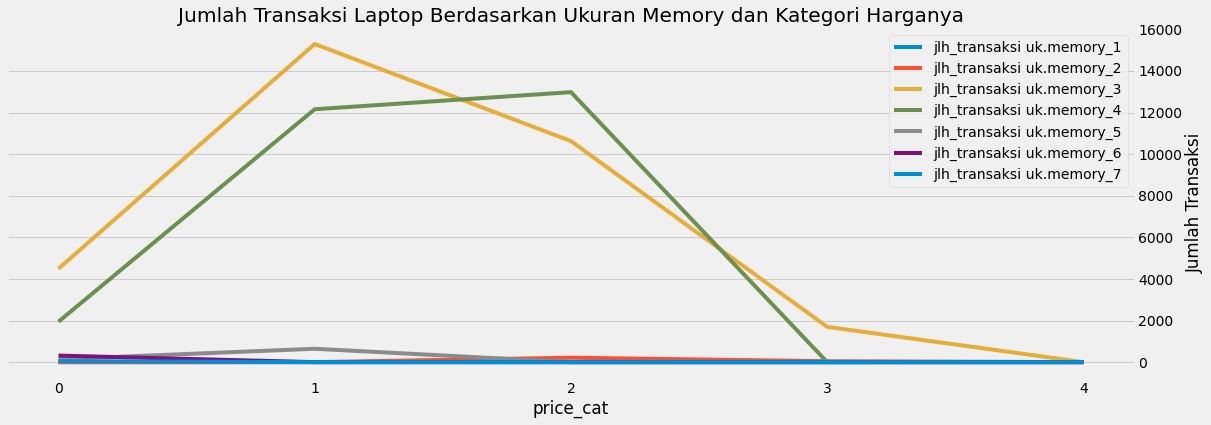

In [ ]:
piv["jlh_transaksi uk.memory_1"].plot(secondary_y=True, figsize=(18,6))
piv["jlh_transaksi uk.memory_2"].plot(secondary_y=True)
piv["jlh_transaksi uk.memory_3"].plot(secondary_y=True)
piv["jlh_transaksi uk.memory_4"].plot(secondary_y=True)
piv["jlh_transaksi uk.memory_5"].plot(secondary_y=True)
piv["jlh_transaksi uk.memory_6"].plot(secondary_y=True)
piv["jlh_transaksi uk.memory_7"].plot(secondary_y=True)

plt.title("Jumlah Transaksi Laptop Berdasarkan Ukuran Memory dan Kategori Harganya")
plt.xlabel("Ukuran Memory")
plt.ylabel("Jumlah Transaksi")

#plt.xticks([1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48])
#plt.xticks(np.arange(min(index), max('type_cat')+1, 1.0))
plt.xticks(piv.index, rotation=90)

plt.legend(bbox_to_anchor=(1.0, 1.0))

Dari grafik dapat kita lihat bahwa `Cluster 1` terdiri dari data pembelian laptop dengan kategori harga dari 7jutaaan (1) sampai 17jutaan (2) dengan ukuran memory 8 GB dan 12 GB.

### **`clus_0`**

In [ ]:
clus_0['memory_size'].value_counts()

5    25485
4     2686
7     1753
3      396
2      195
6      130
1       19
Name: memory_size, dtype: int64

Jika diperhatikan dari jumlah data transaksinya, jumlah transaksi pembelian laptop berdasarkan ukuran memory diatas 20ribu adalah kategori memory_size 5 (16 GB).

Kita akan melihat lebih detail karakteristik apa yang dimiliki `Cluster 0` ini.

In [ ]:
#seleksi kolom yang ingin digunakan
char0 = pricememory.loc[(pricememory['cluster'] == 0)].groupby(['price_cat', 'memory_size'])['cluster'].count()
char0

price_cat  memory_size
1          6                 57
           7                173
2          5              10433
           6                 73
           7                260
3          4               2275
           5               9732
           7                283
4          2                117
           3                270
           4                337
           5               3016
           7                161
5          1                 19
           2                 78
           3                 83
           4                 39
           5               1811
           7                206
6          3                 43
           4                 35
           5                326
           7                 81
7          5                167
           7                154
8          7                 73
9          7                170
10         7                 40
11         7                 34
12         7                 54
13         7     

`Cluster 0` ini terdiri dari dari semua kategori harga. Namun jika dilihat dari dari sisi jumlah transaksi diatas seribu, maka dapat diambil kategori harga 2 sampai 5. Selain itu, hasilnya juga menunjukkan ukuran memory 5 selalu lebih banyak dari ukuran lainnya pada hampir setiap kategori harga.

In [ ]:
#mengubah series gender menjadi dataframe
kel_0 = char0.to_frame()
kel_0

cluster
price_cat memory_size         
1         6                 57
          7                173
2         5              10433
          6                 73
          7                260
3         4               2275
          5               9732
          7                283
4         2                117
          3                270
          4                337
          5               3016
          7                161
5         1                 19
          2                 78
          3                 83
          4                 39
          5               1811
          7                206
6         3                 43
          4                 35
          5                326
          7                 81
7         5                167
          7                154
8         7                 73
9         7                170
10        7                 40
11        7                 34
12        7                 54
13        7                 23
16        7                  8
17        7                 33

In [ ]:
char0 = char0.reset_index()

In [ ]:
char0 = char0.set_index('price_cat')
char0

,memory_size,cluster
price_cat,,
1,6,57
1,7,173
2,5,10433
2,6,73
2,7,260
3,4,2275
3,5,9732
3,7,283
4,2,117


In [ ]:
char0.rename(columns = {'cluster': 'jlh_transaksi'}, inplace = True)
char0

,memory_size,jlh_transaksi
price_cat,,
1,6,57
1,7,173
2,5,10433
2,6,73
2,7,260
3,4,2275
3,5,9732
3,7,283
4,2,117


In [ ]:
piv2 = char0.pivot_table(index='price_cat', columns='memory_size').fillna(0)
piv2.columns = [f'{col[0]} uk.memory_{col[1]}' for col in piv2.columns]
piv2

,jlh_transaksi uk.memory_1,jlh_transaksi uk.memory_2,jlh_transaksi uk.memory_3,jlh_transaksi uk.memory_4,jlh_transaksi uk.memory_5,jlh_transaksi uk.memory_6,jlh_transaksi uk.memory_7
price_cat,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,57.0,173.0
2,0.0,0.0,0.0,0.0,10433.0,73.0,260.0
3,0.0,0.0,0.0,2275.0,9732.0,0.0,283.0
4,0.0,117.0,270.0,337.0,3016.0,0.0,161.0
5,19.0,78.0,83.0,39.0,1811.0,0.0,206.0
6,0.0,0.0,43.0,35.0,326.0,0.0,81.0
7,0.0,0.0,0.0,0.0,167.0,0.0,154.0
8,0.0,0.0,0.0,0.0,0.0,0.0,73.0
9,0.0,0.0,0.0,0.0,0.0,0.0,170.0


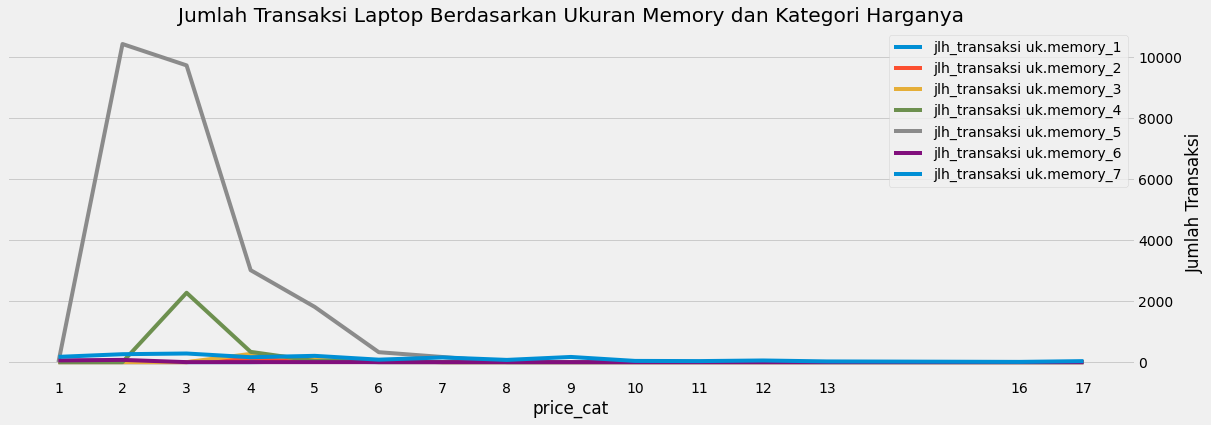

In [ ]:
piv2["jlh_transaksi uk.memory_1"].plot(secondary_y=True, figsize=(18,6))
piv2["jlh_transaksi uk.memory_2"].plot(secondary_y=True)
piv2["jlh_transaksi uk.memory_3"].plot(secondary_y=True)
piv2["jlh_transaksi uk.memory_4"].plot(secondary_y=True)
piv2["jlh_transaksi uk.memory_5"].plot(secondary_y=True)
piv2["jlh_transaksi uk.memory_6"].plot(secondary_y=True)
piv2["jlh_transaksi uk.memory_7"].plot(secondary_y=True)

plt.title("Jumlah Transaksi Laptop Berdasarkan Ukuran Memory dan Kategori Harganya")
plt.xlabel("Kategori Harga")
plt.ylabel("Jumlah Transaksi")

plt.xticks(piv2.index, rotation=90)

plt.legend(bbox_to_anchor=(1.0, 1.0))

Dari grafik dapat kita lihat bahwa `Cluster 0` terdiri dari data pembelian laptop dengan kategori harga dari 12jutaaan (2) sampai 22jutaan (3) dengan ukuran memory 16 GB (5).